The goal here is to do logistic regression on the Iris Dataset.

There are 4 atributes are 3 possible classes

Logistic Regression is basically a single layer neural network with sofmax activation function 

In [49]:
from mlswarm import neuralnet 
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

#DATASET-------------------------------
data = pd.read_csv('Datasets/iris.data', header = None)
data.loc[:,4] = pd.Categorical(data.loc[:,4])
data_X = data.loc[:, 0:3].values
data_Y = pd.get_dummies(data.loc[:,4], prefix = 'category').values

#Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.1, random_state=42)

In [54]:
nn_architecture = [
    {"input_dim": 4, "output_dim": 3, "activation": "softmax"}
]

#CREATE NEURAL NETWORK
nn = neuralnet(nn_architecture)

#INITIALIZE CLOUD WITH 5 PARTICLES ACCORDING TO XAVIER INITIALIZATION
nn.init_cloud(N = 20)

#TRAINING
nn.train(X = X_train, Y = Y_train, 
          method = "swarm_derivfree", 
          max_epochs= 1000, n_batches = 1, batch_size = X_train.shape[0],
          learning_rate = 0.1, var_epsilon = 0,
          cost_type = 'rmse', #or logistic_cross_entropy
          kernel_a = "auto", alpha_init = 0, alpha_rate = 1, beta = 0, gamma = 1, 
          verbose = False)

Finding kernel constant...
Kernel constant found: 0.05

Training started...
Maximum amount of epochs reached

Function value at cloud mean: 0.05237926950820062
Cost function evaluated 20000 times

The clock time (CPU time) for train_nn was 1.41310 (1.39062) seconds


Test set accuracy using particle 0: 1.00000
Test set accuracy using cloud mean: 1.00000


<Figure size 432x288 with 0 Axes>

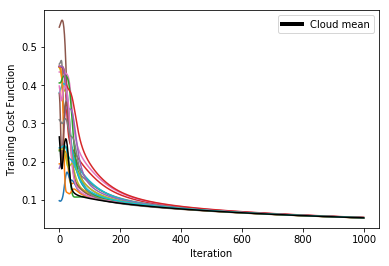

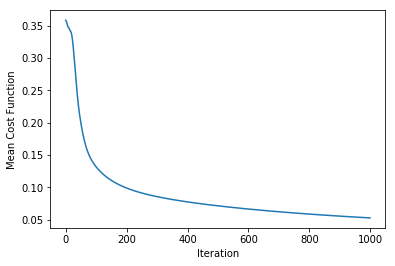

In [55]:
#PLOT COST HISTORY
nn.plot_cost_history()

#ACCURACY ON TEST SET USING PARTICLE 0 WEIGHTS
nn.prediction_accuracy_particle(X_test, Y_test, acc_type = "logistic_accuracy", particle = 0)

#ACCURACY ON TEST SET USING CLOUD MEAN WEIGHTS
nn.prediction_accuracy_mean_particle(X_test, Y_test, acc_type = "logistic_accuracy")